In [2]:
import pandas as pd
import re
import nltk

In [3]:
# Read in the data 22SevenTweets.csv called raw, remove first column
raw = pd.read_csv('22SevenNetwork.csv', index_col=0)
raw

,User,Tweet,URL,Reply_Count,Retweet_Count,Like_Count,Quote_Count,Location
Date,,,,,,,,
2023-03-30 17:54:54+00:00,22seven,https://t.co/Jeb6gqdXBS,https://twitter.com/22seven/status/16414992544...,0,0,0,0,South Africa
2023-03-30 17:54:51+00:00,22seven,https://t.co/Gwbc02nJVC,https://twitter.com/22seven/status/16414992423...,1,0,0,0,South Africa
2023-03-30 17:54:49+00:00,22seven,https://t.co/HKvRhbylY8,https://twitter.com/22seven/status/16414992320...,1,0,0,0,South Africa
2023-03-30 17:54:46+00:00,22seven,https://t.co/tmYb7vez1n,https://twitter.com/22seven/status/16414992205...,1,0,0,0,South Africa
2023-03-30 17:54:44+00:00,22seven,https://t.co/QzjRJgXKvW,https://twitter.com/22seven/status/16414992105...,1,0,0,0,South Africa
...,...,...,...,...,...,...,...,...
2012-01-25 14:55:41+00:00,The_Svens,Christo (our uber-Sven) and the team are in Jo...,https://twitter.com/The_Svens/status/162186886...,0,0,0,0,South Africa
2012-01-25 06:15:49+00:00,linder_kate,Circa Gallery #22seven http://t.co/dBvSyLUp,https://twitter.com/linder_kate/status/1620560...,0,0,0,0,Cape Town
2012-01-25 06:14:03+00:00,linder_kate,Circa Gallery #22seven http://t.co/zY2GS6E8,https://twitter.com/linder_kate/status/1620556...,0,0,0,0,Cape Town


In [4]:
# remove rows with user '22seven'
raw = raw[raw['User'] != '22seven']

In [5]:
# Define a regular expression pattern to match only links
link_pattern = re.compile(r'^https?://t\.co/[\w]+$')

# Use the pattern to filter out rows with links only
filtered = raw[~raw['Tweet'].str.match(link_pattern)]

# Print the filtered dataframe
filtered


,User,Tweet,URL,Reply_Count,Retweet_Count,Like_Count,Quote_Count,Location
Date,,,,,,,,
2023-03-29 10:41:51+00:00,Ripanzell,I'm even scared to check my 22seven report. Th...,https://twitter.com/Ripanzell/status/164102788...,0,0,0,0,"Johannesburg, South Africa"
2023-03-27 07:10:23+00:00,generalistjobs,Looking 👀 for a new job? Here’s who’s hiring? ...,https://twitter.com/generalistjobs/status/1640...,0,13,13,1,South Africa
2023-03-25 06:59:58+00:00,lesofthelight,"Hey @22seven, I keep having to delete accounts...",https://twitter.com/lesofthelight/status/16395...,1,0,0,0,Makaekae
2023-03-24 11:22:17+00:00,NotYetUhuru_,22seven. Ni budget(e) plz 🙏🏾,https://twitter.com/NotYetUhuru_/status/163922...,0,1,5,0,NaN
2023-03-24 06:16:32+00:00,NotYetUhuru_,"@AndaManeli 22seven baby, it’s a budgeting app",https://twitter.com/NotYetUhuru_/status/163914...,1,0,3,0,NaN
...,...,...,...,...,...,...,...,...
2012-01-25 14:55:41+00:00,The_Svens,Christo (our uber-Sven) and the team are in Jo...,https://twitter.com/The_Svens/status/162186886...,0,0,0,0,South Africa
2012-01-25 06:15:49+00:00,linder_kate,Circa Gallery #22seven http://t.co/dBvSyLUp,https://twitter.com/linder_kate/status/1620560...,0,0,0,0,Cape Town
2012-01-25 06:14:03+00:00,linder_kate,Circa Gallery #22seven http://t.co/zY2GS6E8,https://twitter.com/linder_kate/status/1620556...,0,0,0,0,Cape Town


In [6]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to clean a tweet
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'www\S+', '', tweet)
    
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join filtered tokens into a cleaned tweet
    cleaned_tweet = ' '.join(filtered_tokens)
    
    return cleaned_tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Clean the Tweet column of the filtered dataframe
filtered['Tweet'] = filtered['Tweet'].apply(clean_tweet)
filtered

,User,Tweet,URL,Reply_Count,Retweet_Count,Like_Count,Quote_Count,Location
Date,,,,,,,,
2023-03-29 10:41:51+00:00,Ripanzell,im even scared check 22seven report sketchy th...,https://twitter.com/Ripanzell/status/164102788...,0,0,0,0,"Johannesburg, South Africa"
2023-03-27 07:10:23+00:00,generalistjobs,looking 👀 new job ’ ’ hiring 👇🏿 franc ozow 22s...,https://twitter.com/generalistjobs/status/1640...,0,13,13,1,South Africa
2023-03-25 06:59:58+00:00,lesofthelight,hey keep delete accounts add account sync like...,https://twitter.com/lesofthelight/status/16395...,1,0,0,0,Makaekae
2023-03-24 11:22:17+00:00,NotYetUhuru_,22seven ni budgete plz 🙏🏾,https://twitter.com/NotYetUhuru_/status/163922...,0,1,5,0,NaN
2023-03-24 06:16:32+00:00,NotYetUhuru_,22seven baby ’ budgeting app,https://twitter.com/NotYetUhuru_/status/163914...,1,0,3,0,NaN
...,...,...,...,...,...,...,...,...
2012-01-25 14:55:41+00:00,The_Svens,christo ubersven team joburg setting scene tom...,https://twitter.com/The_Svens/status/162186886...,0,0,0,0,South Africa
2012-01-25 06:15:49+00:00,linder_kate,circa gallery,https://twitter.com/linder_kate/status/1620560...,0,0,0,0,Cape Town
2012-01-25 06:14:03+00:00,linder_kate,circa gallery,https://twitter.com/linder_kate/status/1620556...,0,0,0,0,Cape Town


In [8]:
# # to save to csv
filtered.to_csv('22SevenTweetsNetworkCLEAN.csv')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud

In [10]:
# !python -m spacy download en_core_web_sm

In [11]:
# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to tokenize and lemmatize a tweet
def process_tweet(tweet):
    doc = nlp(tweet)
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return tokens

# Tokenize and lemmatize the tweets in the Tweet column
filtered['Tokens'] = filtered['Tweet'].apply(process_tweet)
filtered


,User,Tweet,URL,Reply_Count,Retweet_Count,Like_Count,Quote_Count,Location,Tokens
Date,,,,,,,,,
2023-03-29 10:41:51+00:00,Ripanzell,im even scared check 22seven report sketchy th...,https://twitter.com/Ripanzell/status/164102788...,0,0,0,0,"Johannesburg, South Africa","[m, scared, check, 22seven, report, sketchy, t..."
2023-03-27 07:10:23+00:00,generalistjobs,looking 👀 new job ’ ’ hiring 👇🏿 franc ozow 22s...,https://twitter.com/generalistjobs/status/1640...,0,13,13,1,South Africa,"[look, 👀, new, job, hire, 👇, 🏿, franc, ozow, 2..."
2023-03-25 06:59:58+00:00,lesofthelight,hey keep delete accounts add account sync like...,https://twitter.com/lesofthelight/status/16395...,1,0,0,0,Makaekae,"[hey, delete, account, add, account, sync, lik..."
2023-03-24 11:22:17+00:00,NotYetUhuru_,22seven ni budgete plz 🙏🏾,https://twitter.com/NotYetUhuru_/status/163922...,0,1,5,0,NaN,"[22seven, ni, budgete, plz, 🙏, 🏾]"
2023-03-24 06:16:32+00:00,NotYetUhuru_,22seven baby ’ budgeting app,https://twitter.com/NotYetUhuru_/status/163914...,1,0,3,0,NaN,"[22seven, baby, budget, app]"
...,...,...,...,...,...,...,...,...,...
2012-01-25 14:55:41+00:00,The_Svens,christo ubersven team joburg setting scene tom...,https://twitter.com/The_Svens/status/162186886...,0,0,0,0,South Africa,"[christo, ubersven, team, joburg, set, scene, ..."
2012-01-25 06:15:49+00:00,linder_kate,circa gallery,https://twitter.com/linder_kate/status/1620560...,0,0,0,0,Cape Town,"[circa, gallery]"
2012-01-25 06:14:03+00:00,linder_kate,circa gallery,https://twitter.com/linder_kate/status/1620556...,0,0,0,0,Cape Town,"[circa, gallery]"


In [12]:
# Calculate the total number of tokens in the filtered dataframe
total_tokens = sum(filtered['Tokens'].apply(len))

# Print the total number of tokens
print(f'Total number of tokens: {total_tokens}')

Total number of tokens: 83868


In [13]:
# Calculate the top 20 most common tokens in the filtered dataframe
token_counts = Counter([token for tokens in filtered['Tokens'] for token in tokens])
top_20_tokens = token_counts.most_common(20)

# Print the top 20 most common tokens
print('\nTop 20 most common tokens:')
for token, count in top_20_tokens:
    print(f'{token}: {count}')



Top 20 most common tokens:
22seven: 3734
app: 1951
money: 1128
account: 860
thank: 825
bank: 816
not: 730
use: 613
like: 564
m: 494
budget: 472
management: 439
help: 434
good: 434
work: 430
great: 421
amp: 418
financial: 401
old: 400
fnb: 397


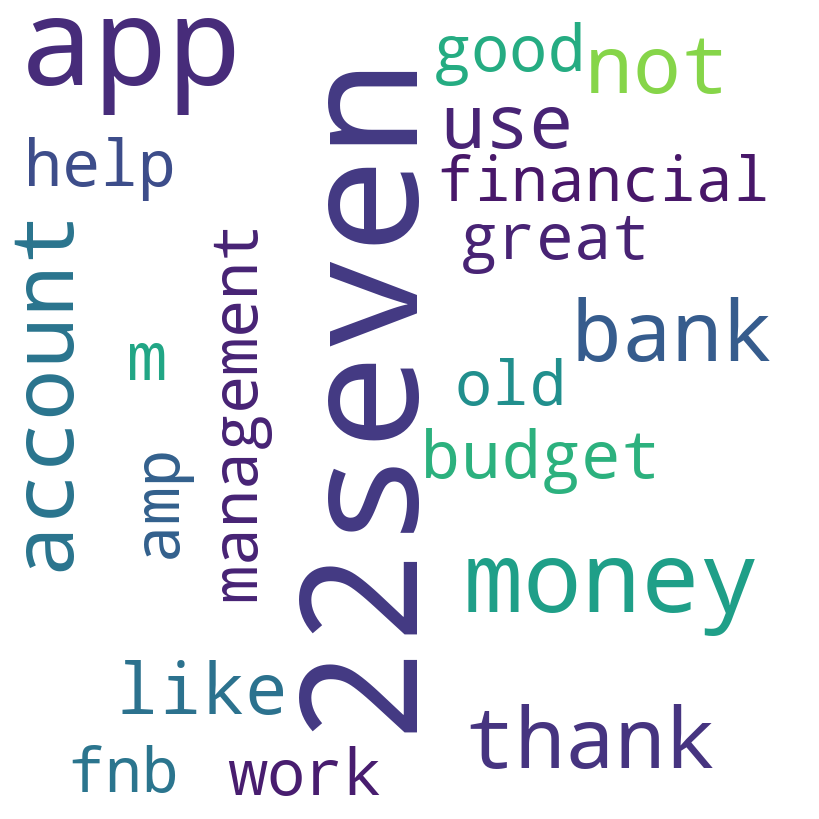

In [14]:
# Plot a wordcloud of the top 50 most common tokens
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(dict(top_20_tokens))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

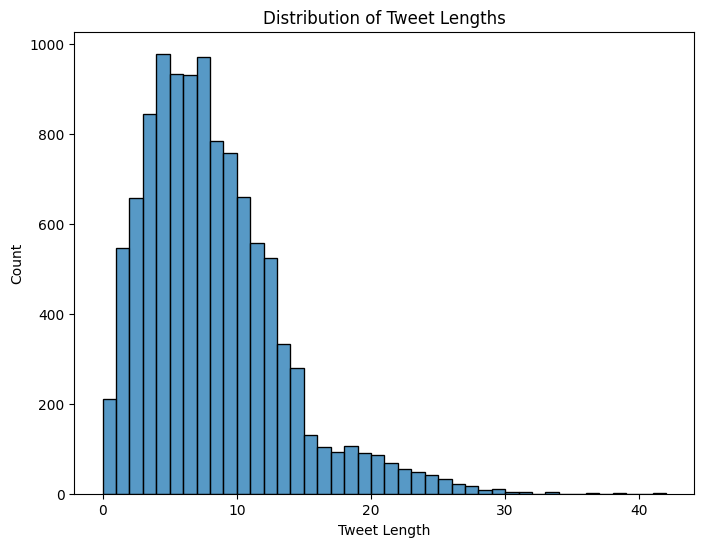

In [19]:
# Calculate the length of each tweet in the filtered dataframe
filtered['Tweet_Length'] = filtered['Tokens'].apply(len)

# Plot a histogram of tweet lengths
plt.figure(figsize=(8, 6))
sns.histplot(filtered, x='Tweet_Length', binwidth=1)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()



In [16]:
# Calculate the average tweet length in the filtered dataframe
avg_tweet_length = filtered['Tweet_Length'].mean()

# Print the average tweet length
print(f'Average tweet length: {avg_tweet_length:.2f}')


Average tweet length: 7.69
